In [7]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./python/')
import sugar
import numpy as np
import graphtools as gt
from scipy.io import loadmat
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
x = loadmat('./matlab/demos/bunny.mat')
x = x['bunny']

In [9]:
sug_obj = sugar.SUGAR(equalize=True,M=2500)

In [10]:
sug_obj.fit(x)

Calculating generation estimate...
  Calculating sparsity estimate...
    Calculating sparsity kernel...
      Calculating distance matrix...
      Calculated distance matrix in 0.05 seconds.
    Calculated sparsity kernel in 0.40 seconds.
  Calculated sparsity estimate in 0.41 seconds.
  Calculating covariance estimation...
  Calculated covariance estimation in 0.15 seconds.
Calculated generation estimate in 0.62 seconds.


SUGAR(M=2500, degree_a=2, degree_k=5, degree_scale=1,
   degree_sigma=<function SUGAR._convert_sigmas.<locals>.<lambda> at 0x7fd1c808ed90>,
   distance_metric='euclidean', equalize=1, low_memory=0, magic_rescale=1,
   mgc_decay=2, mgc_k=5, mgc_magic=1, mgc_scale=1, mgc_sigma=None,
   noise_cov=None, noise_k=5, verbose=1)

In [11]:
sug_obj.generation_estimate

array([1, 1, 1, ..., 2, 2, 0])

In [12]:
Y = sug_obj.transform()

In [13]:
all_data = sug_obj.get_combined_data()

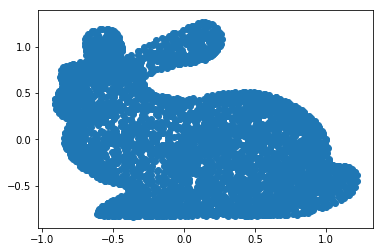

In [14]:
plt.scatter((all_data)[:,0],(all_data)[:,1])

In [15]:
sug_obj.mgc_kernel@Y

array([[ 0.03735137,  0.04984131,  0.02045589],
       [-0.06625532,  0.06316732,  0.01927498],
       [ 0.0019543 ,  0.02669628, -0.00680127],
       ...,
       [ 0.02817462,  0.13809248, -0.05446214],
       [-0.06648505,  0.09856142, -0.08627926],
       [-0.03465804,  0.05161941, -0.04454192]])

In [17]:

def make_swiss_my(num_pts,fac):
    #x=1*np.arange(num_pts)*2*np.pi/float(num_pts)
    x=fac*3*np.pi/2 * (1 + 2*np.arange(num_pts)/float(num_pts))
    print(x.shape)
    z=np.random.uniform(0,2,num_pts)
    swiss=np.stack([2*x*np.cos(x),2*x*np.sin(x)])
    lab=np.arange(num_pts)
#     for i in range(num_pts):
#         circle.append([np.sin(x),np.cos(x)])
#         lab.append(i)
    return swiss.T,x
X, y = make_swiss_my(1500,1)#
sugar1=sugar.SUGAR()
sparsity=sugar1.compute_sparsity(X)

(1500,)
Calculating sparsity estimate...
Calculated sparsity estimate in 0.11 seconds.


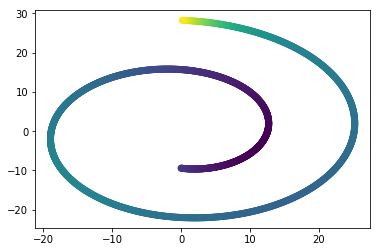

In [18]:
plt.scatter(X[:,0],X[:,1],c=sparsity)